<a href="https://colab.research.google.com/github/DylanGraves/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [118]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
5052,74,7000.00,0,150,2.0,3,1,2000,0
1843,77,9000.00,3,223,2.5,0,1,2007,0
756,55,13999.00,3,121,3.5,3,1,2010,0
6951,59,18932.55,1,0,1.5,0,1,2016,0
6616,52,9200.00,3,48,1.5,3,1,2008,0
709,50,22900.00,3,197,2.2,0,1,2010,2
213,30,12990.00,3,111,1.8,3,1,2011,0
7796,39,8500.00,1,120,1.6,0,1,2008,0
1476,5,69999.00,0,1,2.0,3,1,2016,1
6980,50,12200.00,2,287,3.2,3,1,2000,1


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
X = df.drop(['price'], axis=1)
y = df['price']

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6796, 8) (1699, 8) (6796,) (1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [121]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [122]:
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  -2320262.256534299
Coefficients:  [  -41.59475497 -1836.86956575   -40.31658165   243.9922451
  -998.01095301  4697.51881519  1166.26471028  8565.40314273]


## 1.5 Use the test data to make predictions.

In [123]:
y_pred = model.predict(X_test)
y_pred

array([14297.47057033, 34419.19472235, 15158.4833923 , ...,
       26464.63973005, 34965.03985112, 16655.88338108])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [124]:
print("Root mean square error: ")
np.sqrt(mean_squared_error(y_test, y_pred))

Root mean square error: 


17445.865820621773

In [125]:
print("r2 score: ")
r2_score(y_true=y_test, y_pred=y_pred)

r2 score: 


0.3437122018973494

## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

As year increases (the car is newer) so does the price.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

The Root Mean Square Error should be interpreted as how close (or far away) the actual values were from the model's predicted values.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

R^2 can effectively be interpreted as the accuracy of the model, with the score being the percentage of the dependent variable that is explained by the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['price_log'] = np.log(df['price'])

In [127]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_log
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

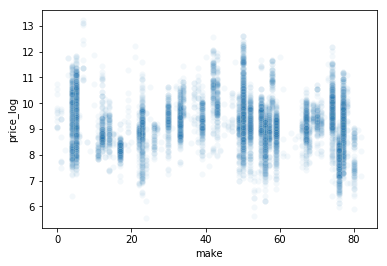

In [128]:
# target = 'price_log'
# for feature in df.drop(target):
#     sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
#     plt.show()


# Tried automating but getting errors so I'll have to do it by hand

sns.scatterplot(x='make', y='price_log', data=df, alpha=0.05);

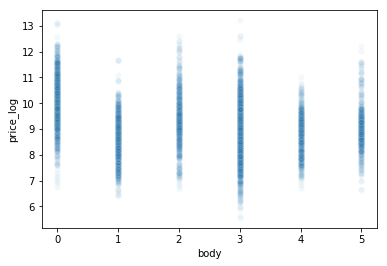

In [129]:
sns.scatterplot(x='body', y='price_log', data=df, alpha=0.05);

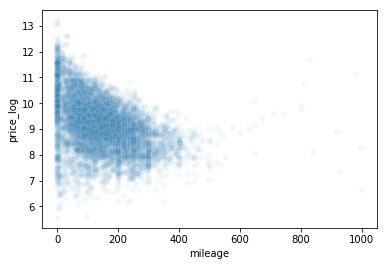

In [0]:
sns.scatterplot(x='mileage', y='price_log', data=df, alpha=0.05);

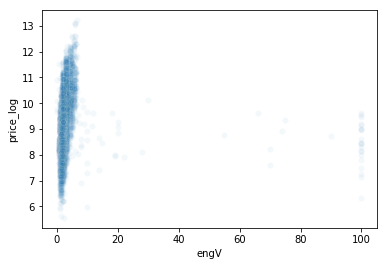

In [0]:
sns.scatterplot(x='engV', y='price_log', data=df, alpha=0.05);

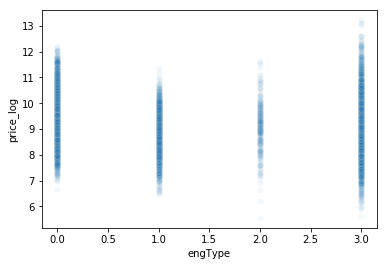

In [0]:
sns.scatterplot(x='engType', y='price_log', data=df, alpha=0.05);

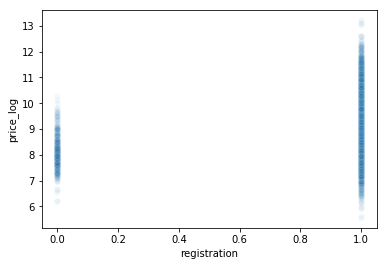

In [0]:
sns.scatterplot(x='registration', y='price_log', data=df, alpha=0.05);

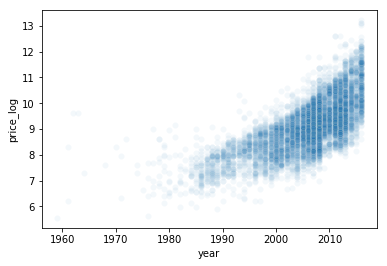

In [0]:
sns.scatterplot(x='year', y='price_log', data=df, alpha=0.05);

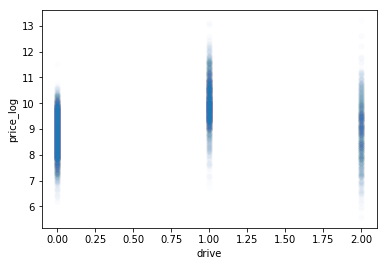

In [0]:
sns.scatterplot(x='drive', y='price_log', data=df, alpha=0.01);

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [136]:
df['year ** 2'] = df['year'] ** 2

df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_log,year ** 2
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [138]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)
print("Root mean square error: ")
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score: ")
r2_score(y_true=y_test, y_pred=y_pred)

(6796, 10) (1699, 10) (6796,) (1699,)
Intercept:  107256813.33364207
Coefficients:  [-3.86518768e+00  2.86748667e+02 -2.70468787e+01  7.00243782e+01
  2.77496018e+02 -1.27422482e+04 -1.06398077e+05 -9.93878291e+02
  2.30327765e+04  2.63408980e+01]
Root mean square error: 
27220.80085133753
r2 score: 


-0.23640689219621502

## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Log-Linear Regression reduces the skew and creates a more normal distribution.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [130]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [131]:
print('R^2', tree.score(X_test, y_test))

R^2 0.8044165022063818


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [132]:
target = 'price_log'
features = df.columns.drop(target)

X = df[features]
y = df[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     3135.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:40:38   Log-Likelihood:                -4843.9
No. Observations:                8495   AIC:                             9708.
Df Residuals:                    8485   BIC:                             9778.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -141.1599      4.307    -32.777   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [135]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           135671.042703
make                 1.060854
price                1.399011
body                 1.178469
mileage              1.586770
engV                 1.014592
engType              1.146684
registration         1.094674
year                 1.608899
drive                1.223291
dtype: float64

Ignoring the constant, it seems good. No Variance Inflation Factor above 10 which is the point at which you should look into it.